In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Detaset**

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 158M/163M [00:01<00:00, 163MB/s]
100% 163M/163M [00:01<00:00, 104MB/s]


In [5]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dpendencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2291.jpg', 'with_mask_2105.jpg', 'with_mask_3603.jpg', 'with_mask_533.jpg', 'with_mask_2005.jpg']
['with_mask_2676.jpg', 'with_mask_1074.jpg', 'with_mask_662.jpg', 'with_mask_2637.jpg', 'with_mask_1013.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2043.jpg', 'without_mask_3414.jpg', 'without_mask_1940.jpg', 'without_mask_3631.jpg', 'without_mask_2640.jpg']
['without_mask_2251.jpg', 'without_mask_1422.jpg', 'without_mask_2920.jpg', 'without_mask_1802.jpg', 'without_mask_3746.jpg']


In [10]:
print('number of mask images:', len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


**Creating Labels for the two class of images**

1.   with mask --> 1
2.   without mask --> 0



In [11]:
# create the labels

with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [13]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

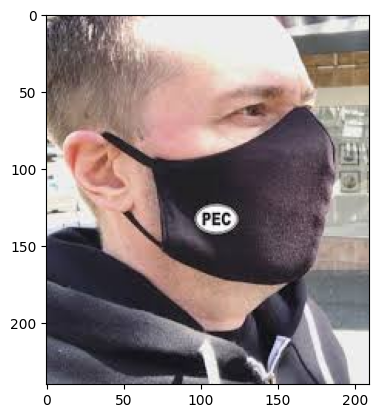

In [14]:
# displaying with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_2637.jpg')
imgplot  = plt.imshow(img)
plt.show()

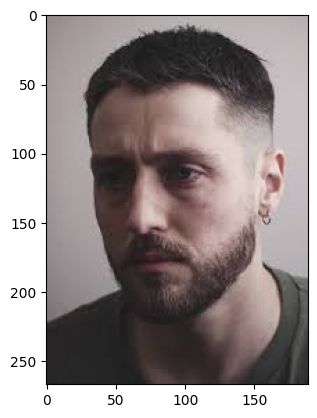

In [15]:
# displaying with mask image

img = mpimg.imread('/content/data/without_mask/without_mask_3414.jpg')
imgplot  = plt.imshow(img)
plt.show()

**Image processing**


1.   Resize the images
2.   Convert the images to numpy arrays



In [24]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [25]:
len(data)

7553

In [26]:
type(data)

list

In [27]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[188, 169, 173],
        [183, 163, 168],
        [168, 151, 155],
        ...,
        [213, 194, 198],
        [214, 195, 199],
        [199, 180, 184]],

       [[190, 171, 175],
        [184, 165, 169],
        [172, 155, 158],
        ...,
        [212, 193, 197],
        [212, 193, 198],
        [189, 170, 174]],

       [[192, 172, 176],
        [190, 170, 174],
        [179, 159, 163],
        ...,
        [216, 196, 199],
        [214, 195, 198],
        [184, 165, 169]]

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
# converting images list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [31]:
type(Y)

numpy.ndarray

In [32]:
print(X.shape)

(7553, 128, 128, 3)


In [33]:
print(Y.shape)

(7553,)


In [34]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [36]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [37]:
X_train[[0]]

array([[[[165, 181, 186],
         [165, 181, 186],
         [165, 181, 186],
         ...,
         [133, 128, 125],
         [133, 128, 125],
         [133, 128, 125]],

        [[164, 179, 184],
         [164, 179, 184],
         [164, 179, 184],
         ...,
         [132, 127, 124],
         [132, 127, 124],
         [132, 127, 124]],

        [[163, 176, 182],
         [163, 176, 182],
         [163, 176, 182],
         ...,
         [132, 127, 123],
         [131, 126, 122],
         [131, 126, 122]],

        ...,

        [[ 57,  75,  95],
         [ 56,  74,  94],
         [ 56,  74,  94],
         ...,
         [ 40,  43,  50],
         [ 40,  43,  50],
         [ 41,  44,  51]],

        [[ 57,  75,  95],
         [ 56,  74,  94],
         [ 56,  74,  94],
         ...,
         [ 40,  43,  50],
         [ 40,  43,  50],
         [ 41,  44,  51]],

        [[ 57,  75,  95],
         [ 56,  74,  94],
         [ 56,  74,  94],
         ...,
         [ 40,  43,  50],
        

In [38]:
X_train_scaled[0]

array([[[0.64705882, 0.70980392, 0.72941176],
        [0.64705882, 0.70980392, 0.72941176],
        [0.64705882, 0.70980392, 0.72941176],
        ...,
        [0.52156863, 0.50196078, 0.49019608],
        [0.52156863, 0.50196078, 0.49019608],
        [0.52156863, 0.50196078, 0.49019608]],

       [[0.64313725, 0.70196078, 0.72156863],
        [0.64313725, 0.70196078, 0.72156863],
        [0.64313725, 0.70196078, 0.72156863],
        ...,
        [0.51764706, 0.49803922, 0.48627451],
        [0.51764706, 0.49803922, 0.48627451],
        [0.51764706, 0.49803922, 0.48627451]],

       [[0.63921569, 0.69019608, 0.71372549],
        [0.63921569, 0.69019608, 0.71372549],
        [0.63921569, 0.69019608, 0.71372549],
        ...,
        [0.51764706, 0.49803922, 0.48235294],
        [0.51372549, 0.49411765, 0.47843137],
        [0.51372549, 0.49411765, 0.47843137]],

       ...,

       [[0.22352941, 0.29411765, 0.37254902],
        [0.21960784, 0.29019608, 0.36862745],
        [0.21960784, 0

**Building a Convolutional Neural Networks (CNN)**

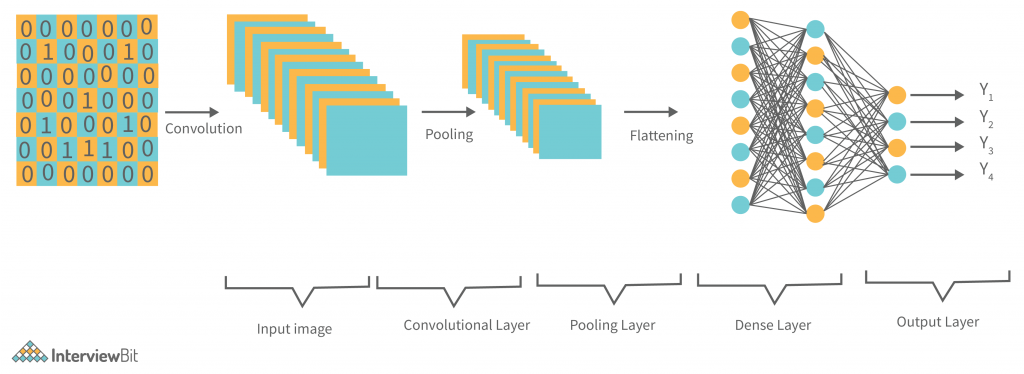

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [46]:
# compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [47]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 20s 23ms/step - loss: 0.4655 - acc: 0.7922 - val_loss: 0.2918 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2957 - acc: 0.8838 - val_loss: 0.2379 - val_acc: 0.8876
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2464 - acc: 0.9042 - val_loss: 0.2067 - val_acc: 0.9140
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2018 - acc: 0.9207 - val_loss: 0.2319 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1622 - acc: 0.9345 - val_loss: 0.2169 - val_acc: 0.9107


**Model Evaluation**

In [48]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.1903 - acc: 0.9279
Test accuracy = 0.9278623461723328
